<a href="https://colab.research.google.com/github/taeuk91/Tensorflow2/blob/main/TF_class_7_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

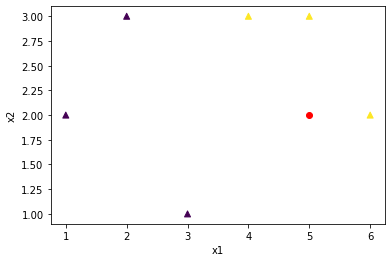

In [ ]:
x_train = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 3],
    [6, 2]], dtype=np.float32)
y_train = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]], dtype=np.float32)

x_test = np.array([[5, 2]], dtype=np.float32)
y_test = np.array([[1]], dtype=np.float32)

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# tf.data.Dataset 파이프라인을 이용하여 값을 입력
# from_tensor_slices 클래스 매서드를 사용하면 리스트, 넘파이, 텐서플로 자료형에서 데이터셋을 만들 수 있음
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2, 1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [ ]:
# 원소의 자료구조 반환
dataset.element_spec

(TensorSpec(shape=(None, 2), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))

In [ ]:
def logistic_regression(features):
    hypothesis = tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

# cost function
def loss_fn(features, labels):
    hypothesis = logistic_regression(features)
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost


def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(features, labels)
    return tape.gradient(loss_value, [W,b])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
epochs = 3000

for step in range(epochs + 1):
    for features, labels in iter(dataset):
        hypothesis = logistic_regression(features)
        grads = grad(hypothesis, features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
        if step % 300 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(features, labels)))
            # print(hypothesis)

Iter: 0, Loss: 0.6874
Iter: 300, Loss: 0.5054
Iter: 600, Loss: 0.4535
Iter: 900, Loss: 0.4228
Iter: 1200, Loss: 0.3992
Iter: 1500, Loss: 0.3790
Iter: 1800, Loss: 0.3608
Iter: 2100, Loss: 0.3442
Iter: 2400, Loss: 0.3288
Iter: 2700, Loss: 0.3146
Iter: 3000, Loss: 0.3013


In [ ]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [ ]:
test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print('Accuracy: {}%'.format(test_acc * 100))

Accuracy: 100%
